# Влияние потребления алкоголя на успеваемость студентов

## 1. Введение

### Цели исследования: 

Определить, как потребление алкоголя влияет на академическую успеваемость студентов.   

Анализ дополнительных факторов (школа, работа родителей, отношения в семье и другие).

### Используемые данные:

Датасет: Student Alcohol Consumption с Kaggle.   

Количество наблюдений: 1044 записи.

### Основные инструменты анализа:

Python (Pandas, Matplotlib, Seaborn).   

Статистические методы: ANOVA, корреляционный анализ.

## 2. Предварительная обработка данных

Импортируем все необходимые библиотеки 

In [100]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

прочитаем все данные в переменную data

In [101]:
data = pd.read_csv("student-mat.csv")   

Изучим структуры данных

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [110]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [111]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Результаты показывают, что данные:

Содержат 395 записей и 33 колонки.  
Все значения полные (пропущенных значений нет).  
Состоят из:  
16 колонок числовых (int64).  
17 колонок категориальных (object)  

теперь проведем проверку на выбросы для этого построим гистограммы для числовых данных

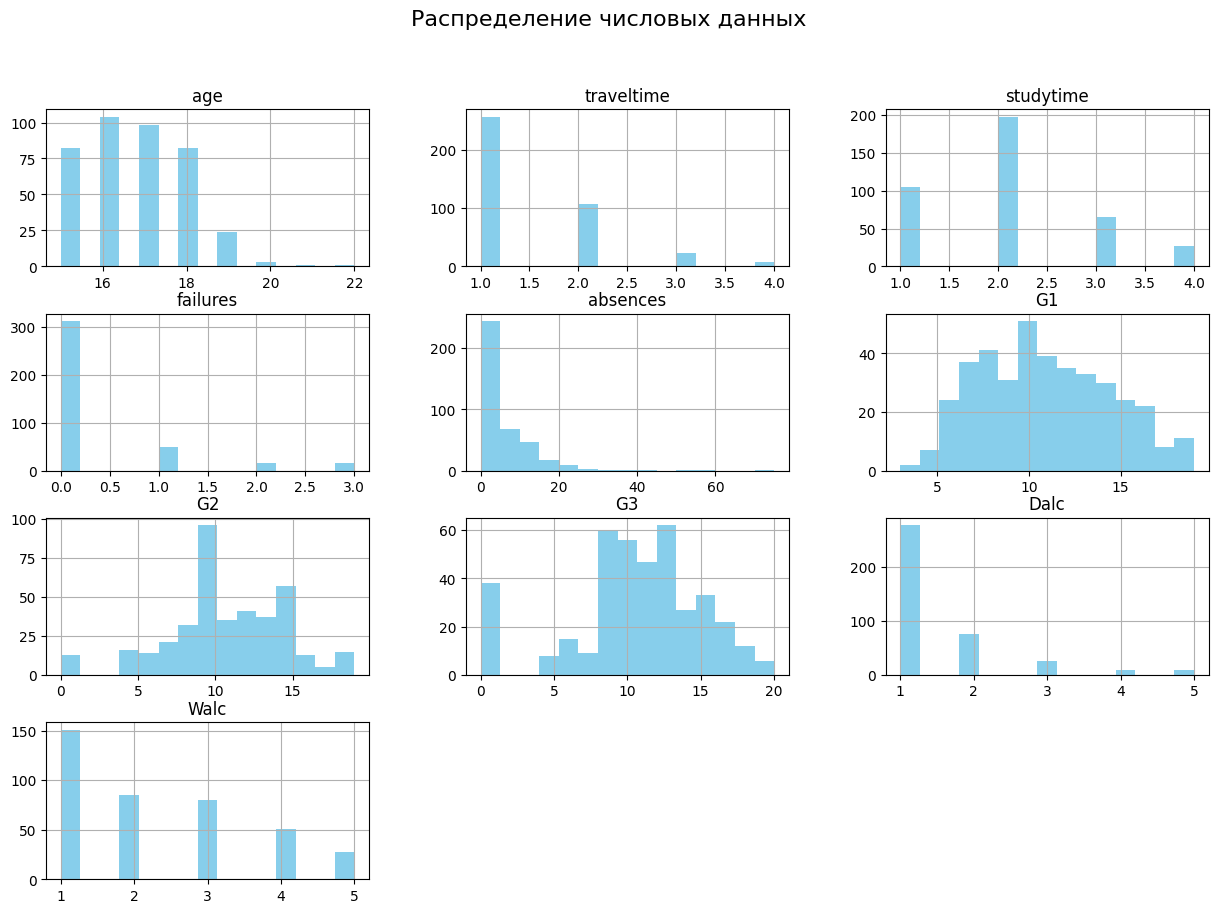

In [102]:
numeric_columns = ['age', 'traveltime', 'studytime', 'failures', 'absences', 'G1', 'G2', 'G3', 'Dalc', 'Walc']
data[numeric_columns].hist(bins=15, figsize=(15, 10), color='skyblue')
plt.suptitle("Распределение числовых данных", fontsize=16)
plt.show()


Видим, что:
1. Колонки Dalc и Walc показывают различия в уровне потребления алкоголя в будни и выходные — это будет ключевым фактором для изучения влияния на успеваемость.   

2. Оценки G1, G2 и G3 распределены нормально, что хорошо для анализа. Мы сможем сравнить средние оценки между группами с разным уровнем потребления алкоголя.   

3. Выбросы в absences (очень большие значения) можно будет обработать или учесть на этапе анализа.   

## 3. Корреляционный анализ

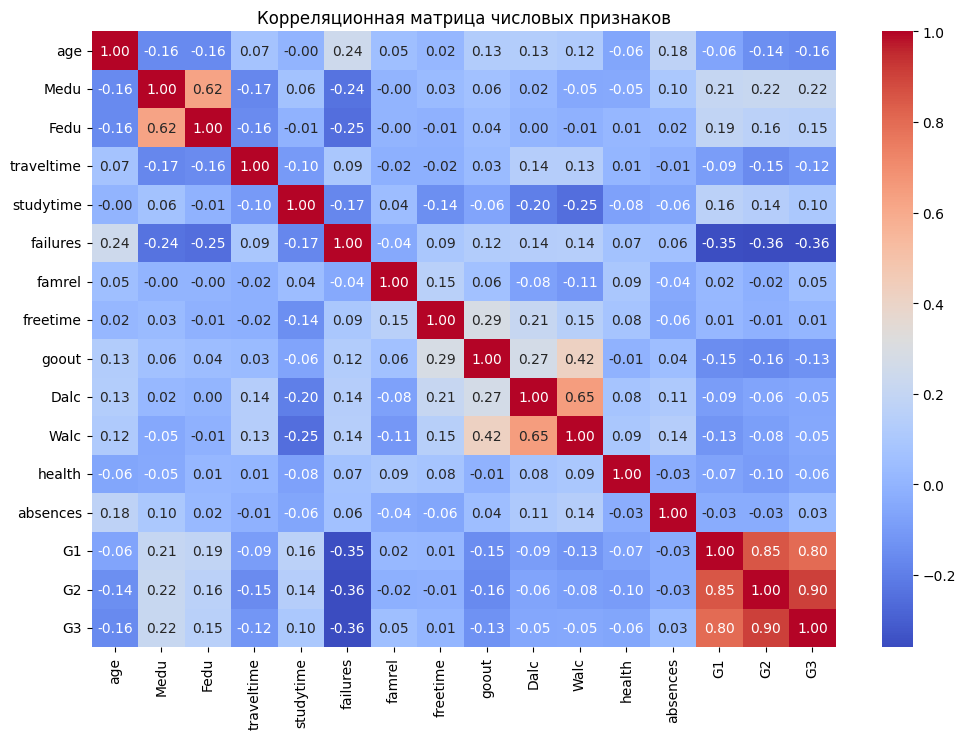

In [103]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица числовых признаков")
plt.show()



1. Сильная корреляция между оценками:
G1, G2 и G3 сильно коррелируют между собой (коэффициенты ~0.85-0.90).
Это логично, так как оценки в разные периоды обучения часто связаны.

2. Корреляция между "failures" и итоговой оценкой G3:
failures имеет умеренную отрицательную корреляцию с G3 (~-0.36).
Больше неудачных попыток = ниже итоговая оценка.

3. Слабая или почти отсутствующая корреляция у большинства признаков:
Например, health, freetime, absences практически не связаны с оценками.

4. Родительское образование (Medu и Fedu):
Имеет небольшую положительную корреляцию с G3 (~0.22).
Это может говорить о том, что уровень образования родителей немного влияет на успеваемость.

5. Алкоголь (Dalc, Walc) и итоговая оценка:
Небольшая отрицательная корреляция: ~-0.05.
Возможно, в дальнейшем потребуется проверить влияние через гипотезы.

## 4. Исследовательский анализ данных (EDA)

### 4.1. Распределение успеваемости G3

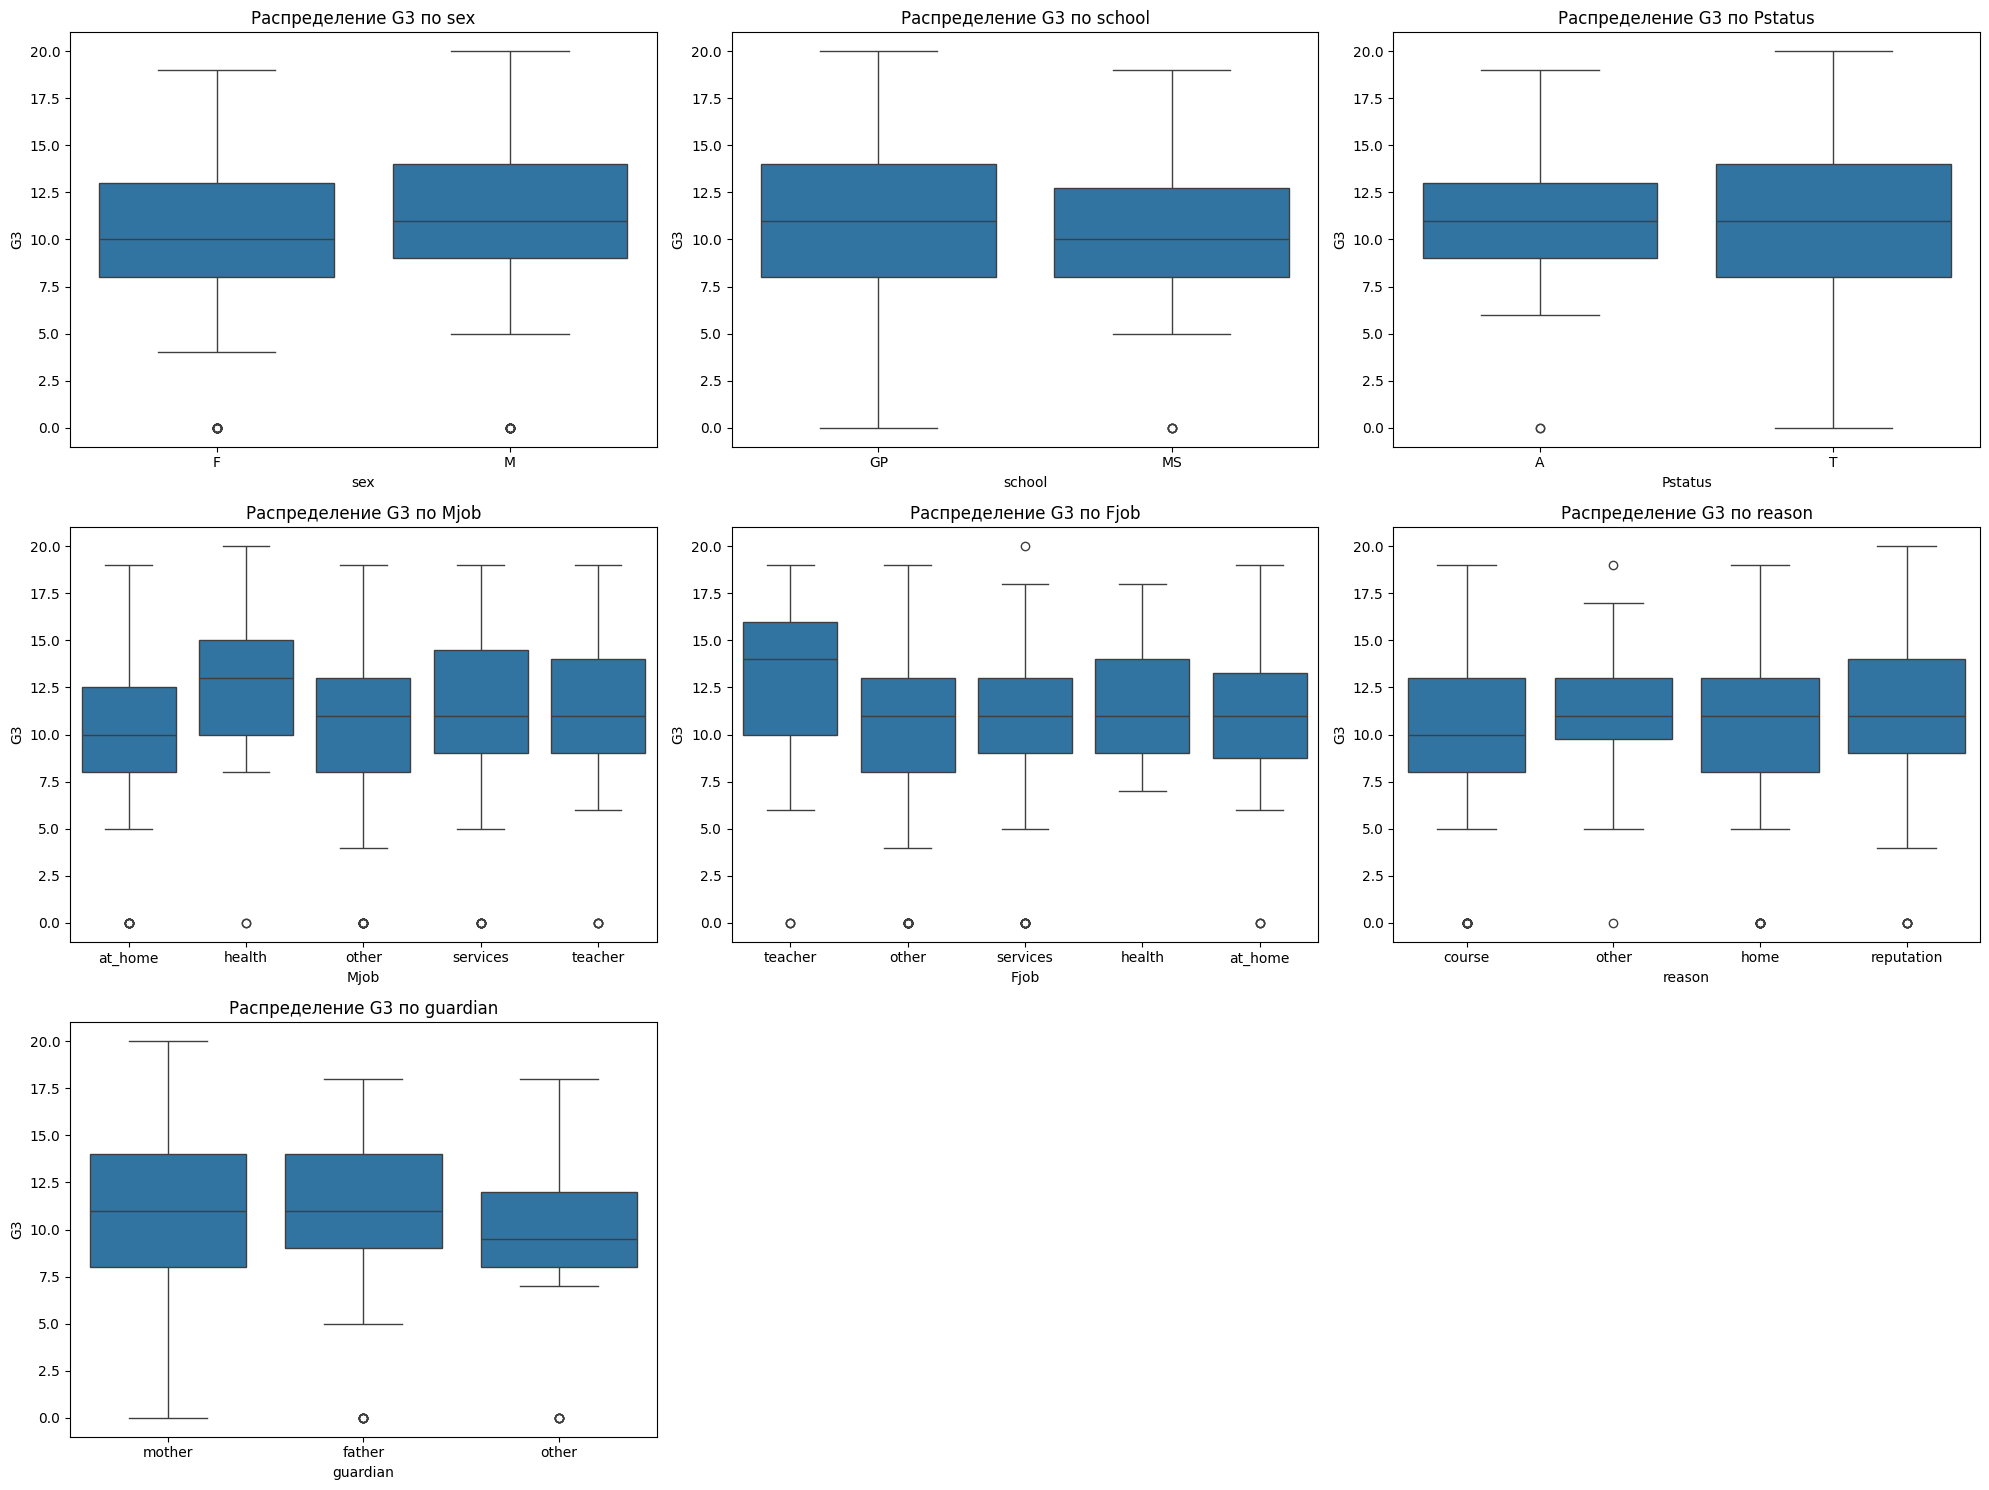

In [ ]:
categorical_features = ['sex', 'school', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=feature, y='G3', data=data)
    plt.title(f'Распределение G3 по {feature}')
    plt.xlabel(feature)
    plt.ylabel('G3')

plt.tight_layout()
plt.show()


1. Пол (sex):
Мужчины (M) и женщины (F) имеют похожее распределение оценок.   
Значительных различий нет.

2. Школа (school):
Студенты из школы GP показывают более высокие оценки G3 в среднем.   
Студенты из школы MS имеют более низкие медианные оценки.

3. Статус совместного проживания родителей (Pstatus):   
Различия между A (раздельно) и T (вместе) несущественные.   
Однако у T медиана выше, чем у A.

4. Профессии родителей (Mjob и Fjob):  
Учителя (teacher) в обоих признаках коррелируют с более высокими оценками G3.   
Профессии health и services также имеют умеренные результаты.  
at_home и other показывают более низкие медианные оценки.  

## 4.2. Потребление алкоголя

построим графики распределения потребления алкоголя

C:\Users\12643\AppData\Local\Temp\ipykernel_11236\866135211.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dalc', y='G3', data=data, palette='coolwarm')


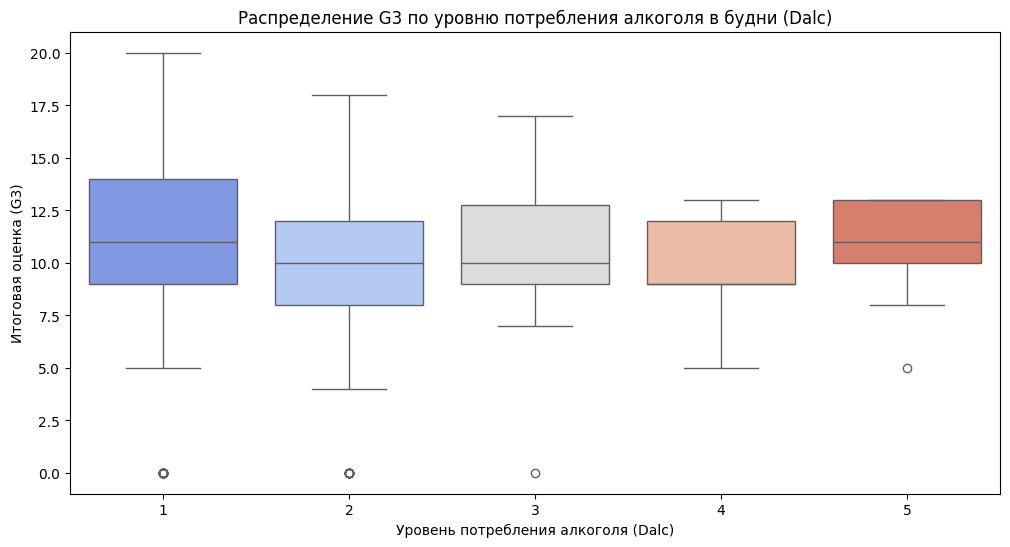

C:\Users\12643\AppData\Local\Temp\ipykernel_11236\866135211.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Walc', y='G3', data=data, palette='coolwarm')


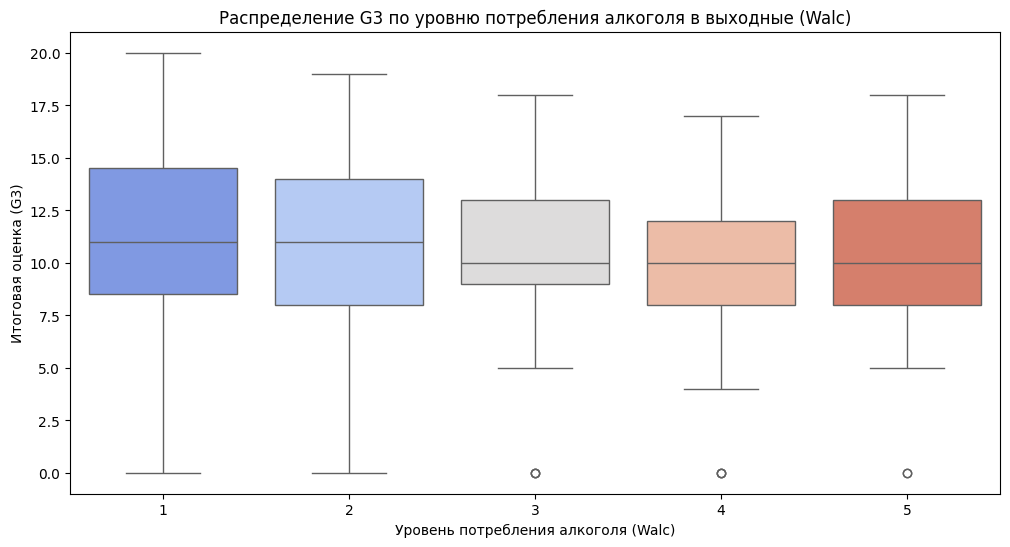

In [105]:

# Dalc 
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dalc', y='G3', data=data, palette='coolwarm')
plt.title('Распределение G3 по уровню потребления алкоголя в будни (Dalc)')
plt.xlabel('Уровень потребления алкоголя (Dalc)')
plt.ylabel('Итоговая оценка (G3)')
plt.show()

# Walc
plt.figure(figsize=(12, 6))
sns.boxplot(x='Walc', y='G3', data=data, palette='coolwarm')
plt.title('Распределение G3 по уровню потребления алкоголя в выходные (Walc)')
plt.xlabel('Уровень потребления алкоголя (Walc)')
plt.ylabel('Итоговая оценка (G3)')
plt.show()


переведем данные с графиков в более понятный вид 

In [123]:
# создаем таблицу

dalc_data = {
    "Уровень потребления алкоголя": [1, 2, 3, 4, 5],
    "Медиана (середина квадрата)": [11, 9.5, 10.5, 11, 11.5],
    "Диапазон (Q1–Q3)": ["8 — 14", "7.5 — 11", "9 — 12", "9 — 12.5", "10 — 13"]
}


dalc_df = pd.DataFrame(dalc_data)

print("Будни (Dalc):")
dalc_df

Будни (Dalc):


,Уровень потребления алкоголя,Медиана (середина квадрата),Диапазон (Q1–Q3)
0,1,11.0,8 — 14
1,2,9.5,7.5 — 11
2,3,10.5,9 — 12
3,4,11.0,9 — 12.5
4,5,11.5,10 — 13


Вывод:

При низком потреблении алкоголя в будни (Dalc = 1) оценки G3 чуть выше (диапазон и медиана больше).

При увеличении уровня потребления алкоголя медиана не сильно меняется, но диапазон сужается. Это говорит о более стабильных оценках в группах с высоким потреблением.

In [116]:
# создаем таблицу

walc_data = {
    "Уровень потребления алкоголя": [1, 2, 3, 4, 5],
    "Медиана (середина квадрата)": [12, 11, 11, 10.5, 10.5],
    "Диапазон (Q1–Q3)": ["8.5 — 14.5", "8 — 13.5", "9 — 13", "8 — 12.5", "8 — 13"]
}

# Создание DataFrame для Walc
walc_df = pd.DataFrame(walc_data)

# Печать таблицы
print("Выходные (Walc):")
walc_df

Выходные (Walc):


,Уровень потребления алкоголя,Медиана (середина квадрата),Диапазон (Q1–Q3)
0,1,12.0,8.5 — 14.5
1,2,11.0,8 — 13.5
2,3,11.0,9 — 13
3,4,10.5,8 — 12.5
4,5,10.5,8 — 13


Вывод:

При низком потреблении алкоголя в выходные (Walc = 1) оценки G3 тоже чуть выше (медиана ≈ 12).

При повышении уровня потребления (Walc = 4 или 5) медиана чуть падает, а диапазон сужается, что указывает на более однородные, но низкие оценки.

Общий вывод по графикам:

Низкий уровень потребления алкоголя (Dalc = 1, Walc = 1) связан с более высокими оценками G3.   
С увеличением потребления алкоголя оценки становятся чуть ниже и более стабильными (сужается разброс).


## 5. Статистическая проверка гипотез

Итак из предыдущих пунктов мы можем выдвинуть гипотезу:  **влияет ли потребление алкоголя на успеваемость?**

Наша гипотеза:  
H₀ (нулевая гипотеза): Средние оценки G3 не зависят от уровня потребления алкоголя.  
H₁ (альтернативная гипотеза): Средние оценки G3 зависят от уровня потребления алкоголя (снижаются при увеличении потребления).  


Для проверки гипотезы используем ANOVA (дисперсионный анализ), так как у нас есть несколько групп (уровни потребления алкоголя).

In [ ]:
from scipy.stats import f_oneway

dalc_groups = [data['G3'][data['Dalc'] == i] for i in sorted(data['Dalc'].unique())]
walc_groups = [data['G3'][data['Walc'] == i] for i in sorted(data['Walc'].unique())]

anova_dalc = f_oneway(*dalc_groups)

anova_walc = f_oneway(*walc_groups)


print("Результаты ANOVA для Dalc (будние дни):")
print(f"F-статистика: {anova_dalc.statistic:.2f}, p-value: {anova_dalc.pvalue:.5f}")

print("\nРезультаты ANOVA для Walc (выходные дни):")
print(f"F-статистика: {anova_walc.statistic:.2f}, p-value: {anova_walc.pvalue:.5f}")


Результаты ANOVA для Dalc (будние дни):
F-статистика: 1.58, p-value: 0.17786

Результаты ANOVA для Walc (выходные дни):
F-статистика: 0.73, p-value: 0.56975


Будние дни (Dalc):
F-статистика = 1.58, p-value = 0.17786  
p-value > 0.05, следовательно, нет статистически значимых различий между средними значениями G3 для разных уровней потребления алкоголя в будние дни.   

**Вывод:** Потребление алкоголя в будние дни не оказывает значимого влияния на итоговую оценку G3.                   

                       


Выходные дни (Walc):
F-статистика = 0.73, p-value = 0.56975  
p-value > 0.05, следовательно, нет статистически значимых различий между средними значениями G3 для разных уровней потребления алкоголя в выходные дни.   

**Вывод:** Потребление алкоголя в выходные дни также не оказывает значимого влияния на итоговую оценку G3.

## Общий вывод:


 На основе результатов ANOVA, можно заключить, что уровень потребления алкоголя (как в будние, так и в выходные дни) статистически не влияет на среднюю оценку G3.

## Бонус

### Проверяем другие факторы, которые могут влиять на потребление алкоголя студентами:



--- Проверка для Dalc ---
school: F-статистика = 5.19, p-value = 0.02320
Pstatus: F-статистика = 0.37, p-value = 0.54440
Mjob: F-статистика = 0.88, p-value = 0.47624
Fjob: F-статистика = 1.31, p-value = 0.26592
guardian: F-статистика = 0.57, p-value = 0.56601
famrel: F-статистика = 1.01, p-value = 0.40095


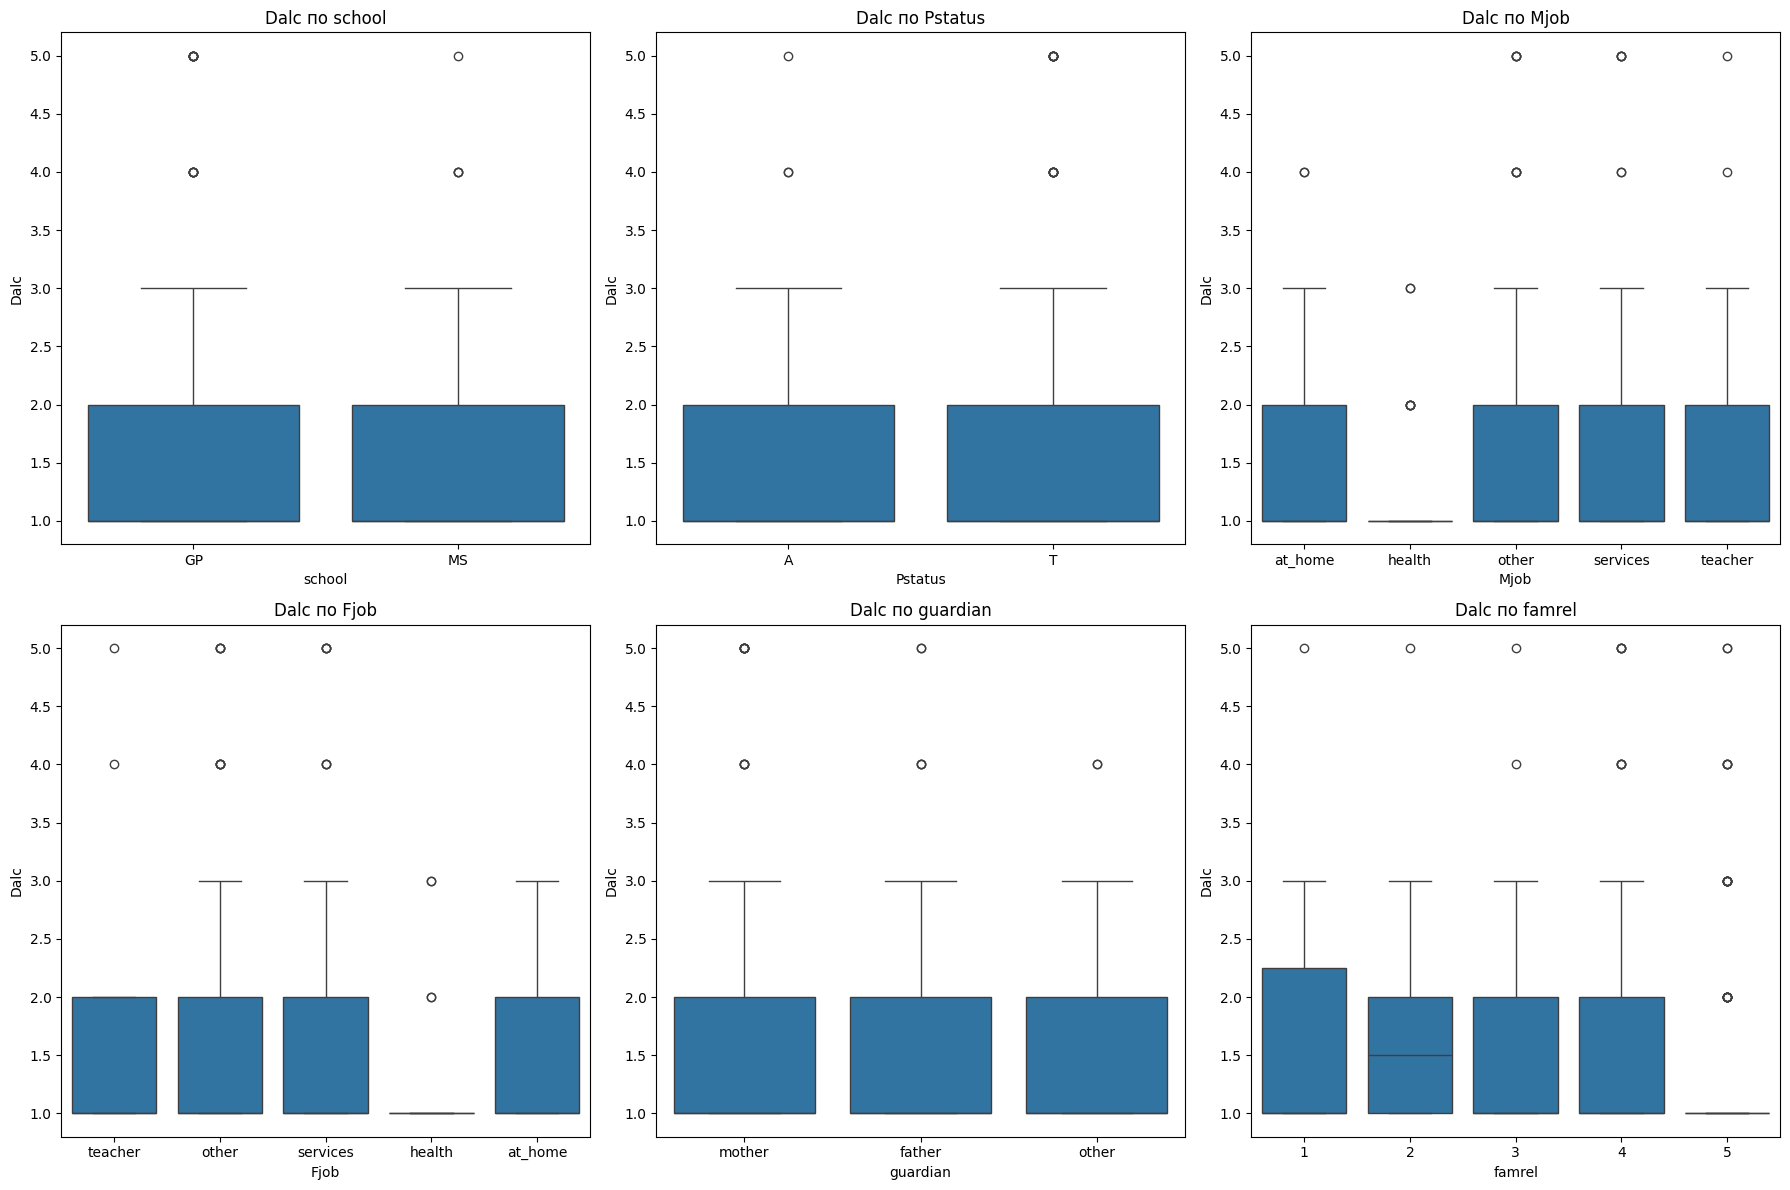


--- Проверка для Walc ---
school: F-статистика = 1.67, p-value = 0.19676
Pstatus: F-статистика = 0.01, p-value = 0.90467
Mjob: F-статистика = 0.11, p-value = 0.98046
Fjob: F-статистика = 3.46, p-value = 0.00851
guardian: F-статистика = 0.45, p-value = 0.63528
famrel: F-статистика = 1.33, p-value = 0.25626


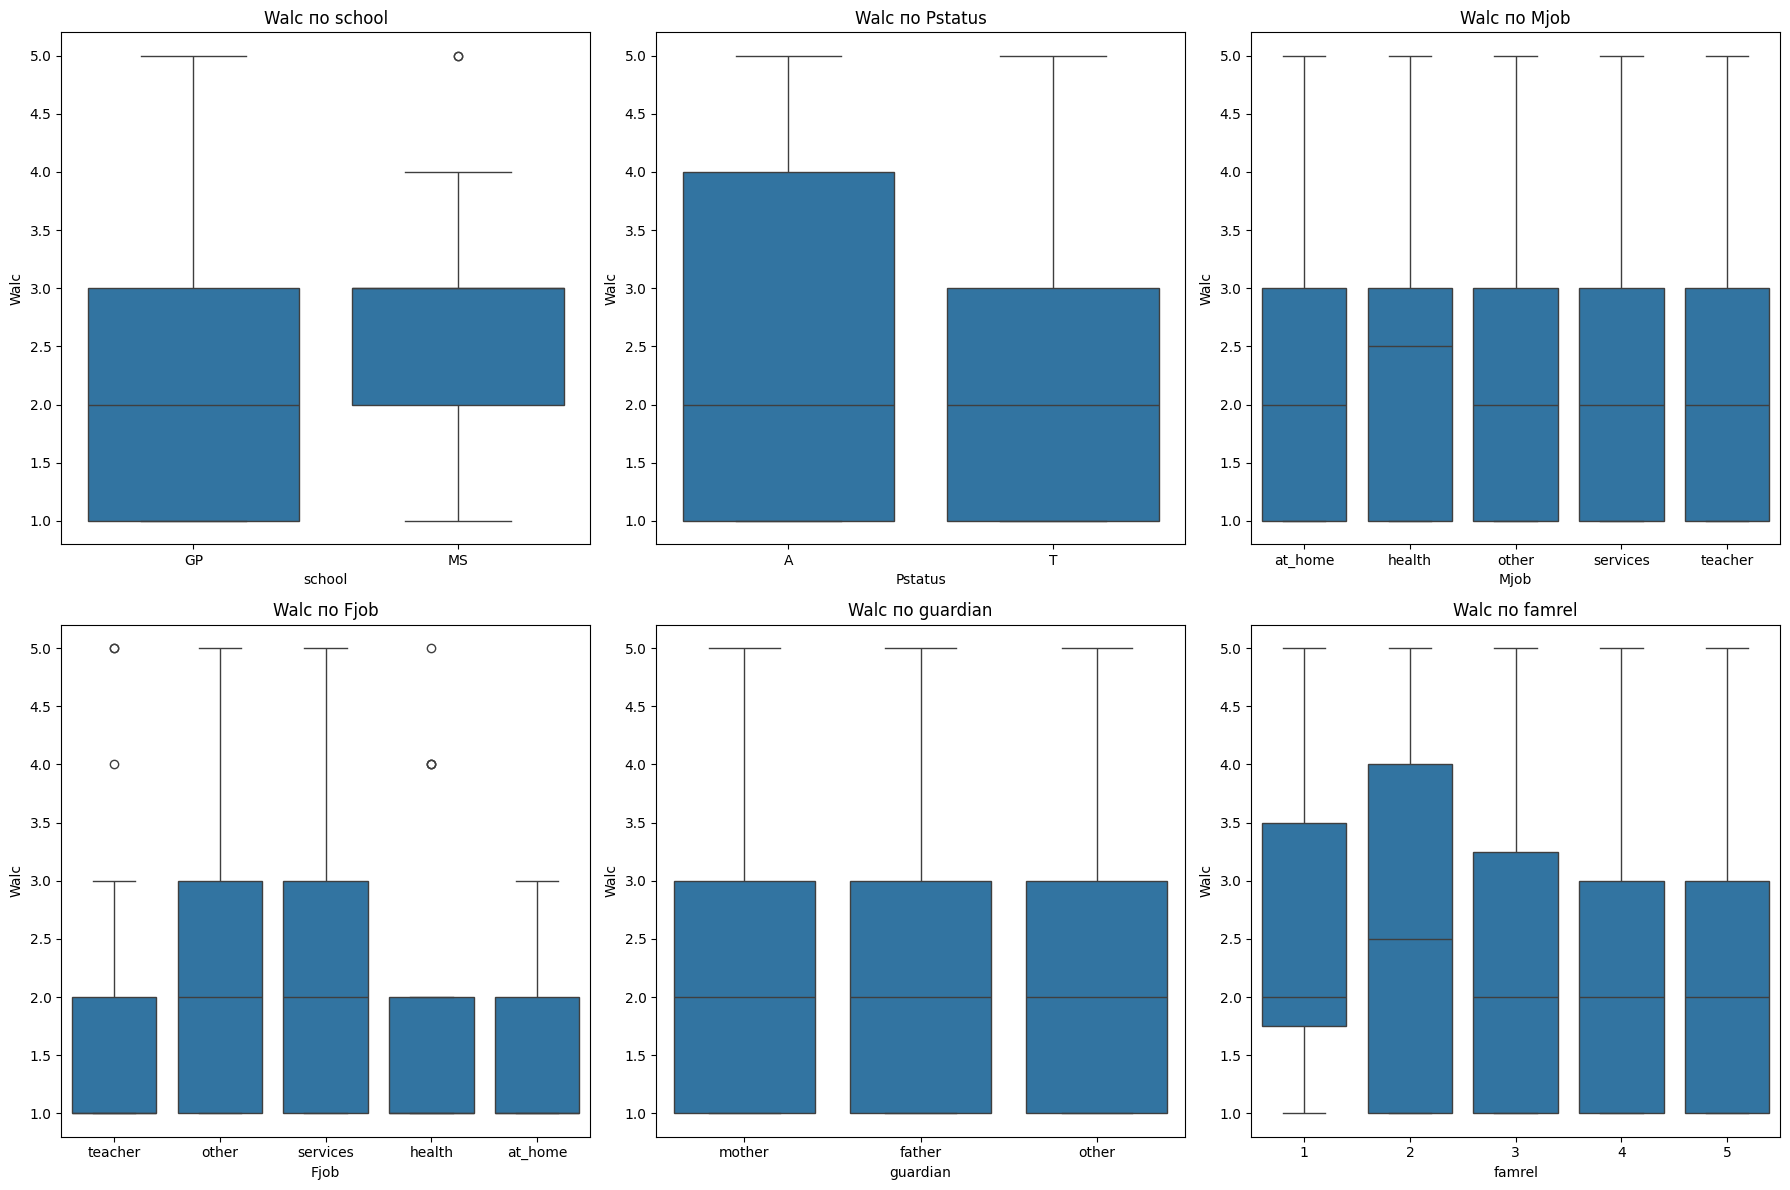

In [129]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = ['school', 'Pstatus', 'Mjob', 'Fjob', 'guardian', 'famrel']

def anova_test(data, group_col, target_col):
    groups = [group[target_col].dropna() for name, group in data.groupby(group_col)]
    f_stat, p_value = stats.f_oneway(*groups)
    return f_stat, p_value

target_columns = ['Dalc', 'Walc']

for target in target_columns:
    print(f"\n--- Проверка для {target} ---")

    n_cols = 3 
    n_rows = -(-len(categorical_columns) // n_cols) 
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))
    axes = axes.flatten()  

    for i, col in enumerate(categorical_columns):
        f_stat, p_value = anova_test(data, col, target)
        print(f"{col}: F-статистика = {f_stat:.2f}, p-value = {p_value:.5f}")
        
        sns.boxplot(x=col, y=target, data=data, ax=axes[i])
        axes[i].set_title(f'{target} по {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(target)
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


Для будних дней (Dalc):  

school (p-value = 0.02320) — есть статистически значимое различие между школами (GP и MS) в потреблении алкоголя по будням.
Это интересно, так как фактор школы влияет на потребление.




Для выходных (Walc):  

Fjob (p-value = 0.00851) — есть статистически значимое различие в потреблении алкоголя на выходных в зависимости от работы отца.
Это также можно исследовать глубже.

немного поподробнее исследуем факторы school и Fjob:

C:\Users\12643\AppData\Local\Temp\ipykernel_11236\1864745141.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='school', y='Dalc', data=data, ci=None)


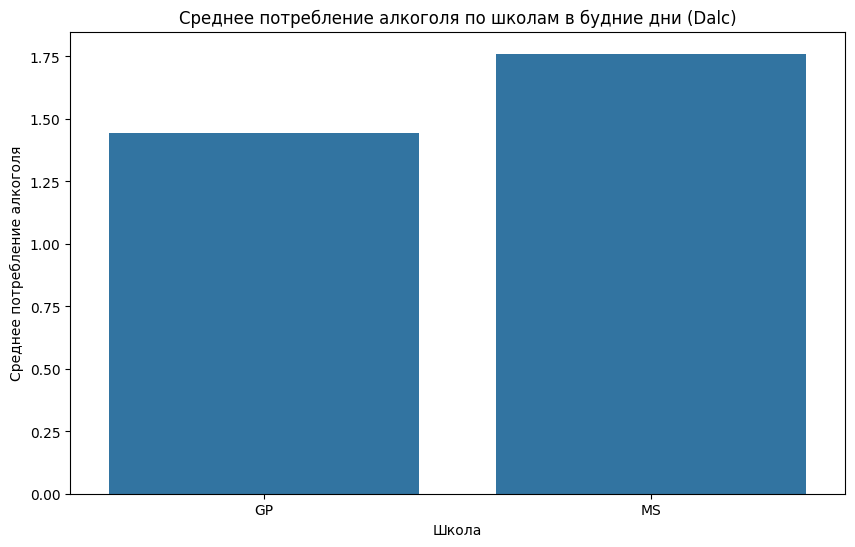

C:\Users\12643\AppData\Local\Temp\ipykernel_11236\1864745141.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Fjob', y='Walc', data=data, ci=None)


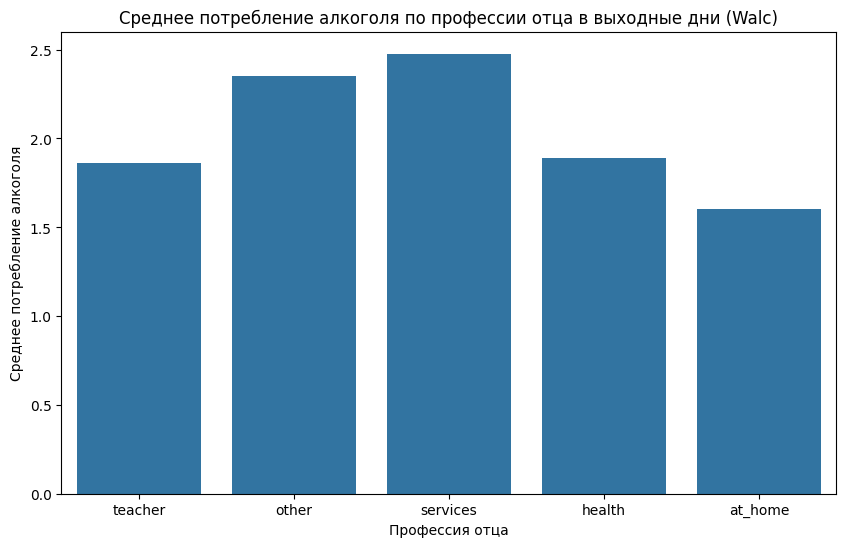

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='school', y='Dalc', data=data, ci=None)
plt.title('Среднее потребление алкоголя по школам в будние дни (Dalc)')
plt.xlabel('Школа')
plt.ylabel('Среднее потребление алкоголя')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Fjob', y='Walc', data=data, ci=None)
plt.title('Среднее потребление алкоголя по профессии отца в выходные дни (Walc)')
plt.xlabel('Профессия отца')
plt.ylabel('Среднее потребление алкоголя')
plt.show()


## **Выводы:**
1. **Корреляционный анализ:**  
   Потребление алкоголя (Dalc, Walc) не имеет значительной корреляции с успеваемостью (G3).

2. **EDA:**  
   - Потребление алкоголя выше на выходных (**Walc**), чем в будние дни (**Dalc**).  
   - Некоторые факторы, такие как профессия отца (Fjob), имеют влияние на потребление алкоголя по выходным (p < 0.05).

3. **Проверка гипотез (ANOVA):**  
   - **Dalc:** Фактор *school* оказывает статистически значимое влияние (p = 0.023).  
   - **Walc:** Фактор *Fjob* также оказывает влияние на потребление (p = 0.008).

Таким образом, влияние потребления алкоголя на успеваемость минимально, но некоторые факторы всё же влияют на уровень потребления алкоголя.
